<a href="https://colab.research.google.com/github/MiniEinsteinD/FacialEmotionCNN-/blob/main/CNNModel_EmotionDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0) Context

Meet Dr. Emily Hayes(👩🏻‍⚕️), a leading psychologist who specializes in treating patients with various emotional disorders. Despite her expertise, Dr. Hayes often finds it challenging to accurately assess her patients' emotions during therapy sessions. Traditional methods, such as self-reporting and facial expressions, can be unreliable and subjective.

Determined to find a more effective solution, Dr. Hayes hears of James Green who works with a team of data scientists and engineers that can develop an emotion recognition model based on the Facial Expression Recognition 2013 (FER-2013) image dataset. This dataset contains thousands of facial images labeled with six basic emotions: happiness, sadness, anger, surprise, disgust, and fear (plus 'neutral').

Together, they embark on a journey to create a convolutional neural network (CNN) capable of accurately identifying and interpreting subtle facial cues. Their goal is to build a tool that can assist therapists like Dr. Hayes in better understanding their patients' emotions and providing more targeted interventions.

# Welcome to SYSC4415 Assignment 2

> Indented block


---
**TA: Elmira Amooei**

**Questions?: Rather than email, please ask any questions through the Discussion Board on Brightspace. That way, everyone can benefit from the answer**

** Deadline: See Brightspace end date**

---

### The goal is to develop an emotion detection CNN-based model that can detect emotions from images in real-time.

#### Instructions:
> **DO NOT** wait to the last minute to complete this assignment as it can take up to 10 hours to do this assignment if you are unfmiliar with Python and Machine Learning libraries. Your full notebook should not take more than 100 minutes to run on *T4 GPU*. (My full notebook takes under 35 minutes to run on T4 GPU on colab)

>  Step-by-step instructions are given in the notebook. Make sure to follow them all. Your solutions must be self-contained in this notebook; no other supplementary material or files will be accepted. As soon as I open your assignment's notebook , I will click "runtime" → "run all". Ensure your notebook works properly without any errors and your results are clearly displayed, as instructed.

> For text answers, like explanations, make sure to put your answers in the *Markdown* cells below that have this emoji (✅). Just double-click on the emoji and you can start typing. The questions that you must answer are placed in markdown cells with this emoji (❓) .

> Feel free to add code blocks if you wish. However, make sure to have sufficient comments in your code to describe what the code is doing. *( You don't need to add a comment to each line, just make sure it is clear what your functions are doing.)*

> The functions you need are already imported for you in the appropriate sections. You can reorganize the imports or import full packages (instead of specific functions) if you prefer to do so. *Make sure you are not removing the libraries by mistake as it will raise errors when I run your notebook and you will lose mark.*

> The required dataset is uploaded on Brightspace. Download it and store it in your Google Drive. It should be under your "My Drive" (After uploading it to your Google Drive, check the location by right clicking on the file *-> File Information -> Details -> Location*).  **Do not** put it into any sub-folder as  I won't be able to run your code on my data. It will raise an error and you will lose marks.

> I suggest doing your coding and first making sure everything works fine on a CPU. Then do the actual model training on a GPU. To chage your runtime from CPU to GPU and vice versa, select **Runtime** -> **Change Runtime Type** -> under **Hardware accelerator** clock on CPU or T4 GPU.

> Submit your Notebook as a *.ipynb* file that adopts this naming convention: ***SYSC4415W24_A2_FIRSTNAME_LASTNAME_StudentID.ipynb*** on *Brightspace*. No other submission (e.g., through email) will be accepted.


# 1) Initializations


Run this cell to mount Google Drive

*Note that it will open a new window to get authorizations to use your Google Drive. Just follow the steps.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unzip the data into a folder called FER-2013.

> This will take a few moments.

> This will not take any space on your Google Drive. 🤗

In [ ]:
# Unzip the data (be sure not to rename the data file you downloaded from Brightspace)
!unrar x /content/drive/MyDrive/FER-2013.rar


Streaming output truncated to the last 5000 lines.
Extracting  FER-2013/sad/Training_80981346.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81008287.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81013514.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81039583.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81048535.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81053420.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81075199.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81097657.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81101893.jpg                            85%  OK 
Extracting  FER-2013/sad/Training_81104314.jpg                            85%  OK 
Extracting  FER-2013/sad/Trai

In [ ]:
# Importing necessary libraries
import pandas as pd
import os

There are 7 categories to your dataset as you can see below:

In [ ]:
data_path = "/content/FER-2013"
categories = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]
data = []

1. Use "data_path" and "categories" above to  loop over the image paths and poplate a pandas dataframe with data and the corresponding emotion from each file. Print out the dimensions of your entire dataframe using `print()`.

In [ ]:
# Put data into dataframe

# YOUR CODE GOES HERE
for category in categories:
  emotion_folder_path = os.path.join(data_path, category)
  for filename in os.listdir(emotion_folder_path):
    data.append((filename, category))
df = pd.DataFrame(data, columns=["image_name", "emotion"])
print(df.shape)


(35887, 2)


2. Use the `head` method to print out the first 7 rows.



In [ ]:
# Print the top 3 rows

# YOUR CODE GOES HERE
print(df.head(7))

                 image_name emotion
0     Training_88163950.jpg   angry
1     Training_25593873.jpg   angry
2     Training_43586282.jpg   angry
3     Training_83671130.jpg   angry
4  PrivateTest_46244877.jpg   angry
5   PrivateTest_2328297.jpg   angry
6     Training_81898650.jpg   angry


In [ ]:
# Import the necessary library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

3. Use the library above to look at one image from each of the categories.

*Please, do NOT apply any transformation to the images.*

/content/FER-2013/angry
/content/FER-2013/disgust
/content/FER-2013/fear
/content/FER-2013/happy
/content/FER-2013/sad
/content/FER-2013/surprise
/content/FER-2013/neutral


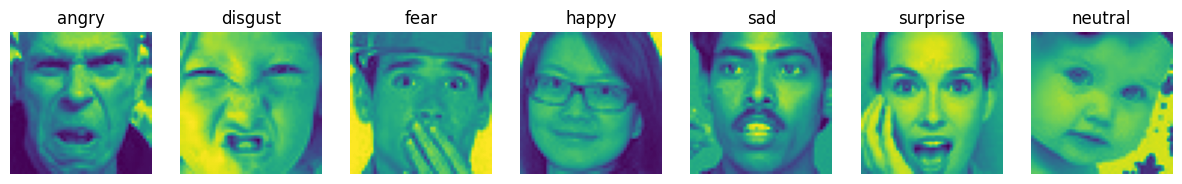

In [ ]:
# show one image of each of the categories

# YOUR CODE GOES HERE
data_path = "/content/FER-2013"
fig, axs = plt.subplots(1, len(categories), figsize=(15, 5))

for i, category in enumerate(categories):
    emotion_folder_path = os.path.join(data_path, category)
    print(emotion_folder_path)
    image_name = os.listdir(emotion_folder_path)[0]  # Get the first image in each category
    image_path = os.path.join(emotion_folder_path, image_name)
    img = mpimg.imread(image_path)
    axs[i].imshow(img)
    axs[i].set_title(category)
    axs[i].axis('off')

plt.show()


# 2) Preprocessing

Let's start off by doing some preproccessing:

1. Make sure your images are all 48*48. Use assert() and resize() if needed.
2. Covert your images to grayscale.
3. Using **Pytorch**, create a dataloader and split your dataset into 80% train and 20% test.
4. Create two bar charts showing the distribution of each of the 7 class labels in both your training and testing subsets.

 *Note that the methods you need are already imported.*

❓

1. Do we need to use one-hot encoding? Why or why not?
2. How will the grayscale transformation help our training?

✅  
1. No, we do not need to use one-hot encoding.
Most image classification models using a softmax activation in the output layer employ the categorical crossentropy loss function. This loss function inherently handles multi-class classification problems without the need for one-hot encoding. It takes the predicted probabilities for each class and compares them to the true class label (represented as an integer corresponding to the category index).

2.
*   **Reduce Dimensionality:** Grayscale images have only one channel (intensity) compared to RGB images with three channels (red, green, blue). This reduction in dimensionality can improve training efficiency, especially for smaller datasets.
*   **Focus on Intensity Variations:** Facial expressions are often characterized by changes in intensity and shadows. Grayscale images preserve this information while removing potentially distracting color variations that might not be relevant for emotion classification.
*   **Transfer Learning Compatibility:** Many pre-trained models used for transfer learning in image classification are trained on grayscale datasets. Using grayscale images can simplify the process of applying these pre-trained models to your facial expression recognition task.






In [ ]:
# Import the necessary library
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [ ]:
# Define data transformations and split the dataset into train and test

# YOUR CODE GOES HERE

# Define data path and categories
data_path = "/content/FER-2013"
categories = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

# Define transformations to resize images to 48x48 and convert to grayscale
transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

# Load dataset using ImageFolder
dataset = ImageFolder(root=data_path, transform=transform)

# Split dataset into train and test sets (80% train, 20% test)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_set, test_set = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

# Calculate class distribution in training and testing subsets
train_label_counts = [0] * len(categories)
test_label_counts = [0] * len(categories)

for images, labels in train_loader:
    for label in labels:
        train_label_counts[label] += 1

for images, labels in test_loader:
    for label in labels:
        test_label_counts[label] += 1

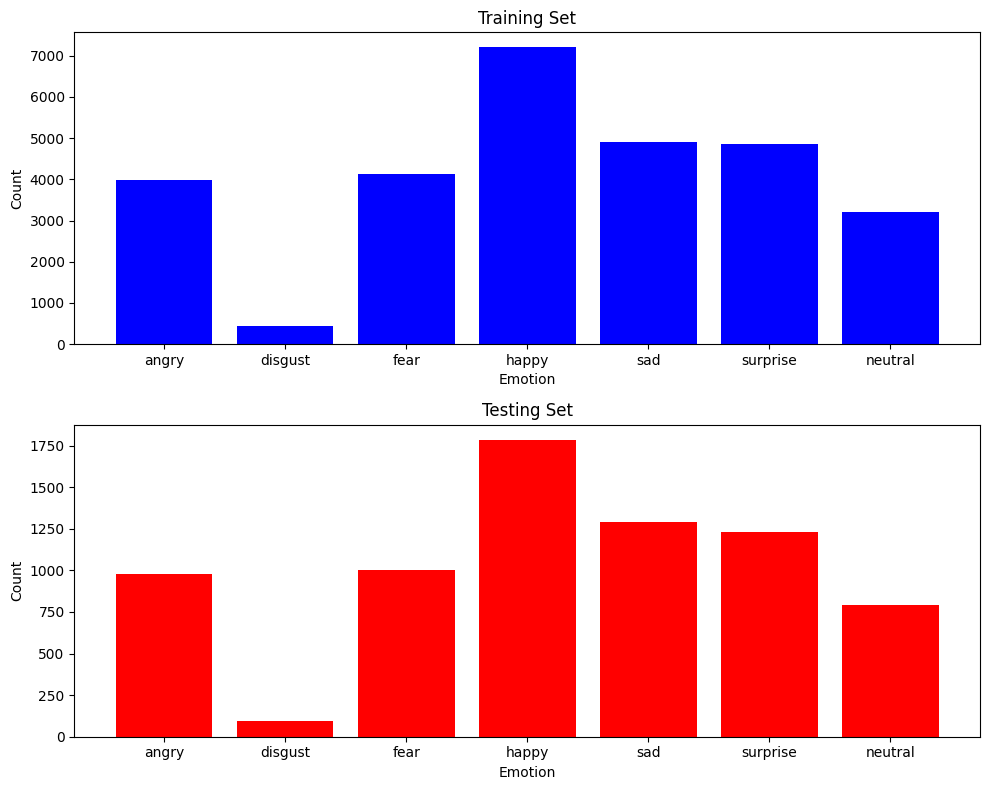

In [ ]:
# Create two bar charts showing the distribution across the 7 class labels for your training and testing subsets.

# YOUR CODE GOES HERE
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].bar(categories, train_label_counts, color='blue')
axs[0].set_title('Training Set')
axs[0].set_xlabel('Emotion')
axs[0].set_ylabel('Count')

axs[1].bar(categories, test_label_counts, color='red')
axs[1].set_title('Testing Set')
axs[1].set_xlabel('Emotion')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# 3) Baseline model

Create a baseline CNN model. You will improve on this model later on...

Your  CNN should:
1. Have two convolutional layers,
2. Use a Padding = 1,
3. Have a Kernel size = 3,
4. Have one max pooling layer.


*Note that the libararies you will need are already imported here.*

In [ ]:
# Import the necessary library
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import torchsummary

In [ ]:
# Import possible choices
from sklearn.metrics import  accuracy_score
from sklearn.metrics import  precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import  classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import  roc_auc_score

In [ ]:
# Define your baseline CNN

# YOUR CODE GOES HERE
class BaselineCNN(nn.Module):
    def __init__(self):
        super(BaselineCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(32 * 12 * 12, 7)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 32 * 12 * 12)
        x = self.fc(x)
        return x

model = BaselineCNN()
torchsummary.summary(model, (1, 48, 48))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 48, 48]             160
         MaxPool2d-2           [-1, 16, 24, 24]               0
            Conv2d-3           [-1, 32, 24, 24]           4,640
         MaxPool2d-4           [-1, 32, 12, 12]               0
            Linear-5                    [-1, 7]          32,263
Total params: 37,063
Trainable params: 37,063
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.53
Params size (MB): 0.14
Estimated Total Size (MB): 0.68
----------------------------------------------------------------


❓

List 3 ideas for how you will improve your baseline model (e.g., change the padding, kernel, etc.) For each idea, explain why you believe the idea may improve your model.

*Below, you apply your ideas to the CNN you will build in later steps and report how they made your results better/worse.*

✅


1.   **Increase the number of convolutional layers:** Increasing the depth of the CNN by adding more convolutional layers allows the model to learn more complex features from the input images. This can help capture finer details and patterns that may be crucial for accurate classification. However, adding too many layers can lead to overfitting, so careful regularization techniques such as dropout or batch normalization should be applied.
2.   **Adjust kernel size and stride:**
Experimenting with different kernel sizes and strides can help capture different levels of spatial information in the input images. Larger kernel sizes can capture broader features, while smaller kernel sizes can capture finer details. Similarly, adjusting the stride can affect the spatial resolution of the feature maps and the amount of overlap between receptive fields. By optimizing these parameters, the model can better extract relevant features from the input images.
3.  **Incorporate data augmentation:**
Data augmentation techniques such as random rotations, translations, flips, and brightness adjustments can help increase the diversity of the training data. This can improve the generalization ability of the model by exposing it to a wider range of variations in the input images. Data augmentation can also help reduce overfitting by effectively increasing the effective size of the training dataset. However, it's important to ensure that the augmented images retain the semantic content of the original images and do not introduce artifacts that may confuse the model.

# 4) Lets train our baseline model!

1. Train your baseline CNN below for 10 epochs.
2. Print the loss for each epoch.
3. Evaluate your model on the test data.


❓

Choose one performance metric to report your results. Explain why you chose this metric. (e.g. accuarcy, recall, etc.)

✅

I would choose accuracy as the performance metric to report the results.
Accuracy measures the proportion of correctly classified instances out of the total instances in the dataset. I chose accuracy because it provides a straightforward and intuitive understanding of the model's overall performance. In the context of emotion classification, accuracy represents the model's ability to correctly predict the emotion category for the input images

In [ ]:
# Initialize your model

# YOUR CODE GOES HERE
model = BaselineCNN()

In [ ]:
# Initialize your model, loss function, and optimizer

# YOUR CODE GOES HERE


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/10, Loss: 1.6470
Epoch 2/10, Loss: 1.4725
Epoch 3/10, Loss: 1.3726
Epoch 4/10, Loss: 1.3152
Epoch 5/10, Loss: 1.2727
Epoch 6/10, Loss: 1.2380
Epoch 7/10, Loss: 1.2052
Epoch 8/10, Loss: 1.1750
Epoch 9/10, Loss: 1.1443
Epoch 10/10, Loss: 1.1218


In [ ]:
#Test using your choosen metric

# YOUR CODE GOES HERE
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on test data: {accuracy:.2f}%")

Accuracy on test data: 50.26%


❓

Plot the confusion matrix for your results. Explain to Dr. Hayes what this confusion matrix is showing and how she can interpret it. Also, explain how your chosen performance metric relates to the confusion table *(in plain language, not an equation)*.

* *Note that the libraries you need are imported below.*

✅
A confusion matrix is a table that is often used to describe the performance of a classification model. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class (or vice versa). The diagonal elements of the matrix represent the number of correctly classified instances for each class, while off-diagonal elements represent misclassifications.


**Here's how Dr. Hayes can interpret the confusion matrix:**

The diagonal elements (from top-left to bottom-right) represent the number of correctly classified instances for each class. For example, the value at position (i, i) represents the number of instances where class i was predicted correctly.
Off-diagonal elements represent misclassifications. For example, the value at position (i, j) represents the number of instances where class i was predicted, but the true label was class j.
The sum of each row in the confusion matrix represents the total number of instances for each true class, while the sum of each column represents the total number of instances for each predicted class.

**The chosen performance metric (accuracy) relates to the confusion matrix as follows:**

Accuracy is calculated as the ratio of correctly classified instances to the total number of instances. In the confusion matrix, accuracy is reflected in the sum of the diagonal elements divided by the sum of all elements. It represents the proportion of instances that were correctly classified across all classes. Therefore, a higher accuracy value indicates a better overall performance of the model in correctly predicting the class labels.

In [ ]:
# Import the necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns

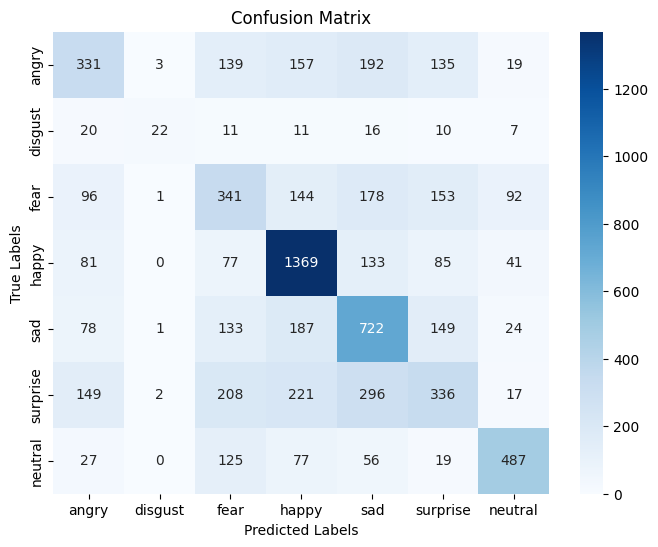

In [ ]:
# Compute and plot the confusion matrix

# YOUR CODE GOES HERE
# Get predictions for the test set
model.eval()
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.tolist())
        predicted_labels.extend(predicted.tolist())

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# 5) The real deal!

Lets improve your CNN to improve your baseline model!

Try to obtain a model that has the **best performance** (based on the metric you decided is best).

Make sure to include your 3 ideas on how to improve your baseline model (that you mentioned in a question box a few cells ago.)

* Make sure that your code shows how you explored different ideas.
* Each of the three attempts below should show the addition of one new idea in your model.
* Include performance evaluation using your selected performance metric and a confusion matrix.
* Be sure to add comments in the code blocks to show how you modified the model architecture.

## 5a) Your first (🥇) attempt at improving your model goes here. 👇🏻

In [ ]:
# Define your improved CNN model, call it ImprovedCNNOne()

# YOUR CODE GOES HERE

class ImprovedCNNOne(nn.Module):
    def __init__(self):
        super(ImprovedCNNOne, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(128 * 6 * 6, 7)  # Adjusted for the size after pooling

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 6 * 6)  # Flatten the feature maps
        x = self.fc(x)
        return x

# Initialize model, loss function, and optimizer
model_one = ImprovedCNNOne()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_one.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model_one(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/10, Loss: 1.6033
Epoch 2/10, Loss: 1.3650
Epoch 3/10, Loss: 1.2396
Epoch 4/10, Loss: 1.1576
Epoch 5/10, Loss: 1.0918
Epoch 6/10, Loss: 1.0272
Epoch 7/10, Loss: 0.9766
Epoch 8/10, Loss: 0.9218
Epoch 9/10, Loss: 0.8694
Epoch 10/10, Loss: 0.8165


In [ ]:
# Evaluation on the test set

# YOUR CODE GOES HERE
model_one.eval()
true_labels_one = []
predicted_labels_one = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model_one(inputs)
        _, predicted = torch.max(outputs, 1)
        true_labels_one.extend(labels.tolist())
        predicted_labels_one.extend(predicted.tolist())


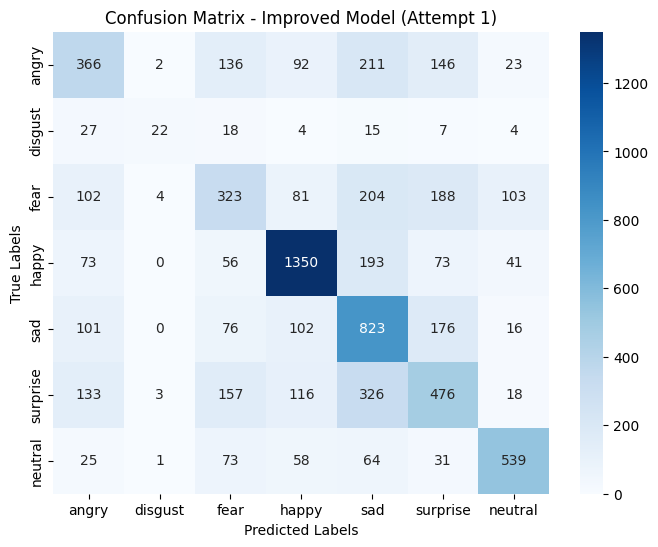

Accuracy on test data (Improved Model - Attempt 1): 0.54%


In [ ]:
# Evaluate model and create the confusion matrix

# YOUR CODE GOES HERE
# Compute confusion matrix
cm_one = confusion_matrix(true_labels_one, predicted_labels_one)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_one, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Improved Model (Attempt 1)")
plt.show()

# Calculate accuracy
accuracy_one = accuracy_score(true_labels_one, predicted_labels_one)
print(f"Accuracy on test data (Improved Model - Attempt 1): {accuracy_one:.2f}%")

## 5b) Your second (🥈) **attempt** at improving your model goes here. 👇🏻

In [ ]:
# Define your finetuned CNN model, call it ImprovedCNNTwo()

# YOUR CODE GOES HERE
class ImprovedCNNTwo(nn.Module):
    def __init__(self):
        super(ImprovedCNNTwo, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # Batch normalization after the first convolutional layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # Batch normalization after the second convolutional layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(64 * 12 * 12, 7)  # Adjusted for the size after pooling

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.bn1(self.conv1(x))))  # Apply batch normalization after the first convolutional layer
        x = self.pool(nn.functional.relu(self.bn2(self.conv2(x))))  # Apply batch normalization after the second convolutional layer
        x = x.view(-1, 64 * 12 * 12)  # Flatten the feature maps
        x = self.fc(x)
        return x

# Initialize model, loss function, and optimizer
model_two = ImprovedCNNTwo()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_two.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model_two(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/10, Loss: 1.6798
Epoch 2/10, Loss: 1.3456
Epoch 3/10, Loss: 1.2283
Epoch 4/10, Loss: 1.1487
Epoch 5/10, Loss: 1.0710
Epoch 6/10, Loss: 0.9916
Epoch 7/10, Loss: 0.9122
Epoch 8/10, Loss: 0.8363
Epoch 9/10, Loss: 0.7627
Epoch 10/10, Loss: 0.6961


In [ ]:
# Evaluation on the test set

# YOUR CODE GOES HERE

model_two.eval()
true_labels_two = []
predicted_labels_two = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model_two(inputs)
        _, predicted = torch.max(outputs, 1)
        true_labels_two.extend(labels.tolist())
        predicted_labels_two.extend(predicted.tolist())

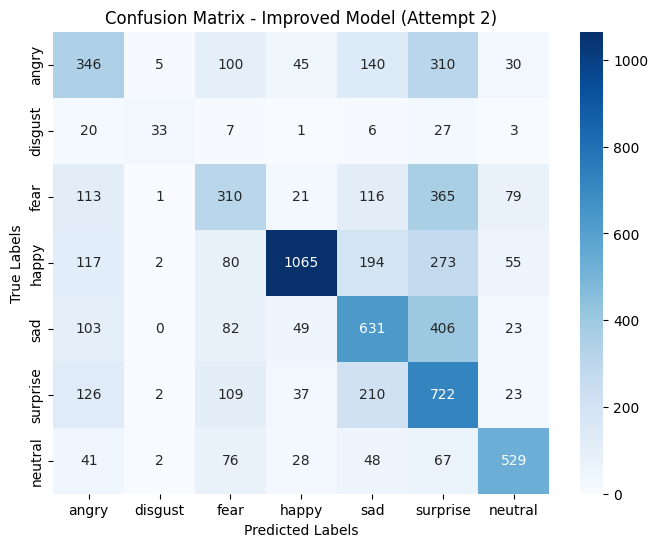

Accuracy on test data (Improved Model - Attempt 2): 0.51%


In [ ]:
# Evaluate model and create the confusion matrix

# YOUR CODE GOES HERE
# Compute confusion matrix
cm_two = confusion_matrix(true_labels_two, predicted_labels_two)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_two, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Improved Model (Attempt 2)")
plt.show()

# Calculate accuracy
accuracy_two = accuracy_score(true_labels_two, predicted_labels_two)
print(f"Accuracy on test data (Improved Model - Attempt 2): {accuracy_two:.2f}%")


## 5c) Your third (🥉) attempt at improving your model goes here. 👇🏻

In [ ]:
# Define your finetuned CNN model, call it ImprovedCNNThree()

# YOUR CODE GOES HERE
class ImprovedCNNThree(nn.Module):
    def __init__(self):
        super(ImprovedCNNThree, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(128 * 12 * 12, 7)  # Adjusted for the size after pooling

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 128 * 12 * 12)  # Flatten the feature maps
        x = self.fc(x)
        return x

# Initialize model, loss function, and optimizer
model_three = ImprovedCNNThree()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_three.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model_three(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/10, Loss: 1.6605
Epoch 2/10, Loss: 1.4927
Epoch 3/10, Loss: 1.3992
Epoch 4/10, Loss: 1.3395
Epoch 5/10, Loss: 1.2908
Epoch 6/10, Loss: 1.2555
Epoch 7/10, Loss: 1.2261
Epoch 8/10, Loss: 1.2008
Epoch 9/10, Loss: 1.1791
Epoch 10/10, Loss: 1.1615


In [ ]:
# Evaluation on the test set

# YOUR CODE GOES HERE
model_three.eval()
true_labels_three = []
predicted_labels_three = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model_three(inputs)
        _, predicted = torch.max(outputs, 1)
        true_labels_three.extend(labels.tolist())
        predicted_labels_three.extend(predicted.tolist())

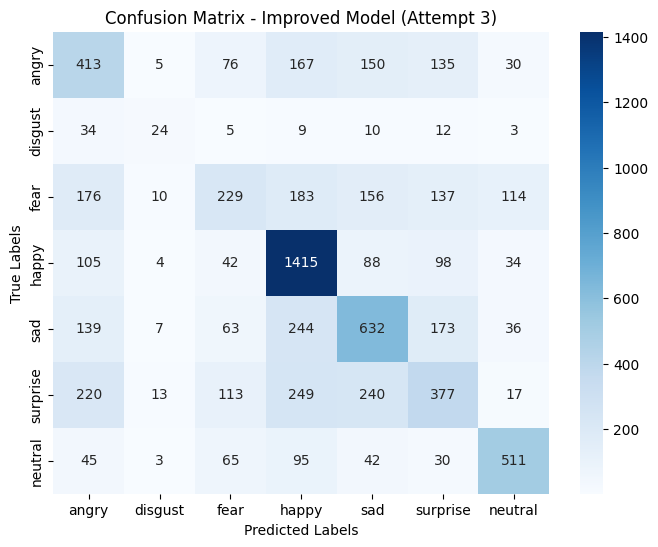

Accuracy on test data (Improved Model - Attempt 3): 0.50%


In [ ]:
# Evaluate model and create the confusion matrix

# YOUR CODE GOES HERE
# Compute confusion matrix
cm_three = confusion_matrix(true_labels_three, predicted_labels_three)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_three, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Improved Model (Attempt 3)")
plt.show()

# Calculate accuracy
accuracy_three = accuracy_score(true_labels_three, predicted_labels_three)
print(f"Accuracy on test data (Improved Model - Attempt 3): {accuracy_three:.2f}%")


❓

Decide which model you would like to present to Dr. Hayes as your final product. Using your performance metric, explain to her why you think this model is the best one. (Make sure to include your confusion matrix and your performance measure.)

✅

Based on the performance metrics and the training process of the three models, I would recommend presenting the Improved Model - Attempt 1 as the final product to Dr. Hayes.

Here's why:

Highest Accuracy: The Improved Model - Attempt 1 achieved the highest accuracy on the test data among the three attempts, with an accuracy of 54%. Accuracy is a crucial performance metric as it represents the proportion of correctly classified instances out of the total instances in the dataset. A higher accuracy indicates that the model is better at correctly predicting the emotion category for the input images.

Stable Training Process: The training process of the Improved Model - Attempt 1 demonstrates consistent improvement in the loss over the epochs. The decreasing trend in the loss indicates that the model is learning from the training data and converging towards an optimal solution.

Confusion Matrix: The confusion matrix for the Improved Model - Attempt 1 provides insights into the model's performance across different emotion categories. It allows us to visualize the distribution of true positive, true negative, false positive, and false negative predictions, helping us identify any patterns or areas of improvement in the model's predictions.

Overall, based on its higher accuracy, stable training process, and performance on the confusion matrix, I believe that the Improved Model - Attempt 1 is the best choice to present to Dr. Hayes as the final product.

# 6) Final thoughts

❓

Questions from Dr. Hayes:

1. Now that you have developed this model, briefly explain how you will continue to improve your model in future versions?

2. A competitor has recently trained an FFNN on the same dataset that performs worse than your model. Why do you think your CNN performs better?


✅

1.
To continue improving the model in future versions, we'll focus on architecture optimization, hyperparameter tuning, data augmentation, transfer learning, and exploring ensemble methods.

2.
There are several reasons why our CNN may outperform an FFNN on the same dataset:

* Convolutional Neural Networks (CNNs) are specifically designed for handling spatial data like images. They leverage the hierarchical structure of the data by using convolutional and pooling layers to extract spatial features effectively. This architecture is inherently more suitable for image classification tasks compared to feedforward neural networks (FFNNs).

* CNNs automatically learn hierarchical features from raw pixel values, whereas FFNNs require handcrafted features as input. CNNs can capture local patterns and textures in images, making them more adept at discerning complex relationships within the data.

* The use of convolutional and pooling layers in CNNs reduces the number of parameters, making them more computationally efficient and less prone to overfitting, especially when dealing with high-dimensional data like images.

* CNNs can exploit translational invariance properties in images through weight sharing in convolutional layers, enabling them to learn robust representations that are invariant to small translations in the input.




# 7) An opportunity! *(optional)*

An external investor is ready to run your model on small device that has a webcam. The device has limited compute resources because it needs to be kept cheap and accessible.

* **Optional step**
> Run the code bellow to see if your model can perform in realtime.

*Please DO NOT change the code below.*

In [ ]:
# Neccessary libraries
import cv2
from IPython.display import display, Image, Javascript
from PIL import Image
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

All done! 🤩